In [1]:
#libraies
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [3]:
heart = pd.read_csv('heart.csv')

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart.columns = ['age','sex','cp','trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang','oldpeak', 'slope', 'ca','thal', 'target'] 
print(heart.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [7]:
# import heart table into a dataframe named DF
DF=pd.DataFrame(heart)

In [8]:
#what is the shape of your data frame
DF.shape

(303, 14)

In [9]:
DF.size

4242

In [10]:
#Describe the data frame
DF.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Logistic regression on the heart diseases prediction dataset

**Data contains;
• age - age in years
• sex - (1 = male; 0 = female)
cp - chest pain type
• trestbps - resting blood pressure (in mm Hg on admission to the hospital)
• chol - serum cholestoral in mg/dl
• fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
• restecg - resting electrocardiographic results
• thalach - maximum heart rate achieved
• exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
• slope - the slope of the peak exercise ST segment
• ca - number of major vessels (0-3) colored by flourosopy
• thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (I-yes, 0=no)**





# check out target varible is binary

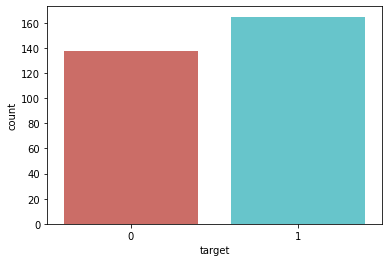

In [11]:
sb.countplot(x = 'target', data = heart, palette = 'hls')

# data visualizations 

<function matplotlib.pyplot.show(*args, **kw)>

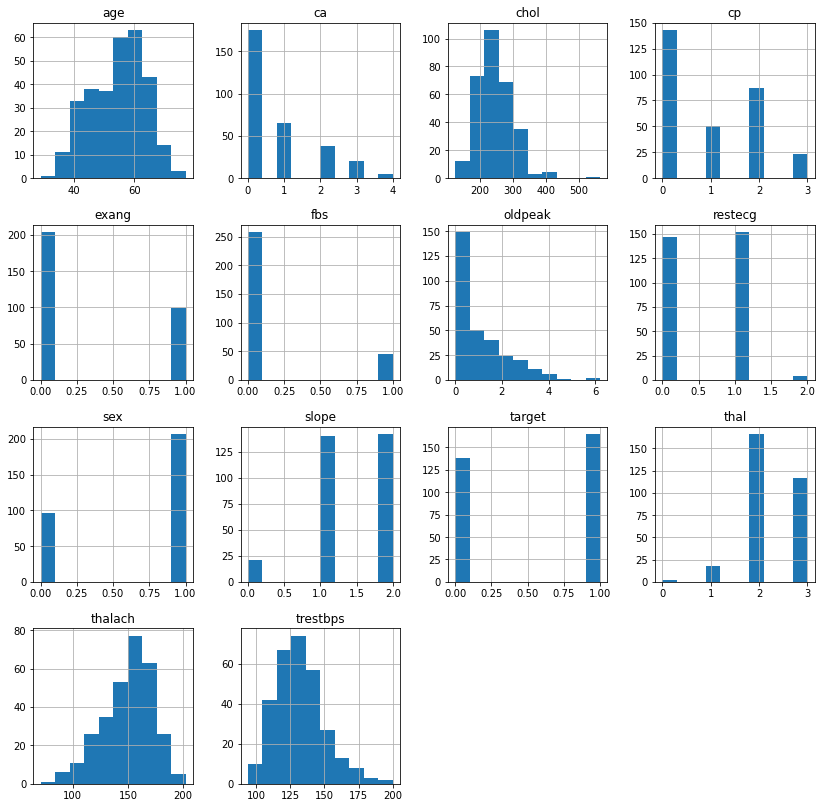

In [12]:
DF.hist(figsize=(14,14))
plt.show

**check the missing value**


In [13]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

check the independecies of variables

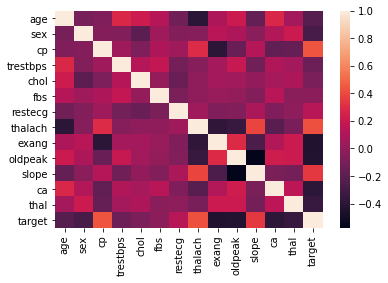

In [14]:
sb.heatmap(heart.corr())

In [15]:
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


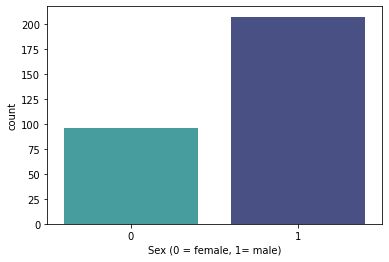

In [16]:
sb.countplot(x='sex', data=heart, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [17]:
countFemale = len(heart[heart.sex == 0])
countMale = len(heart[heart.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [18]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


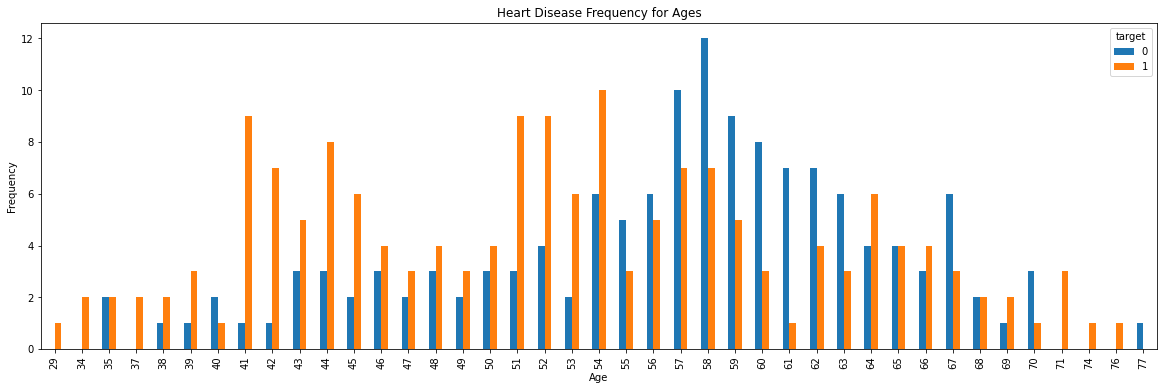

In [19]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

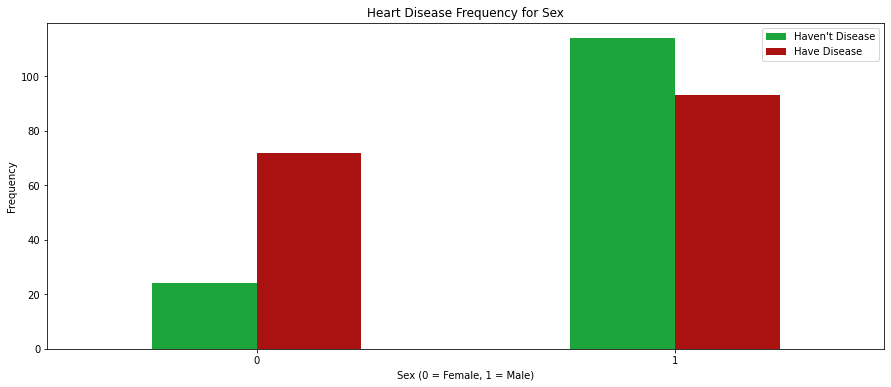

In [20]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

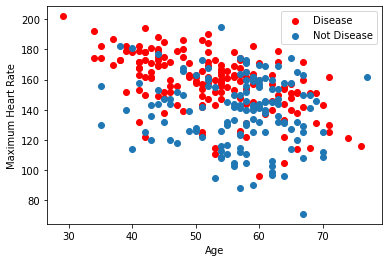

In [21]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

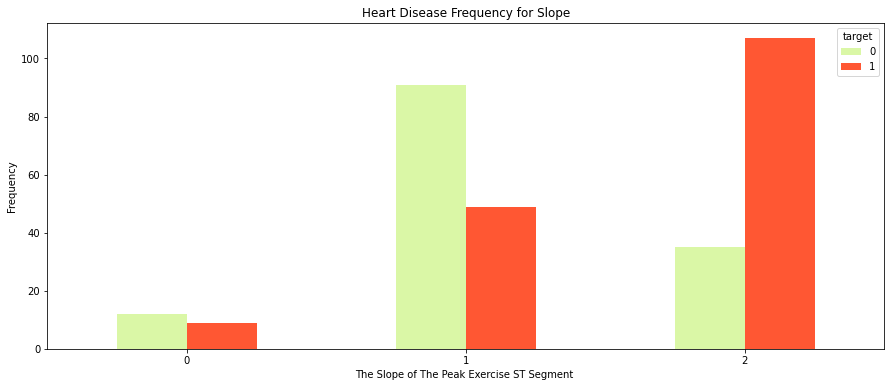

In [22]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

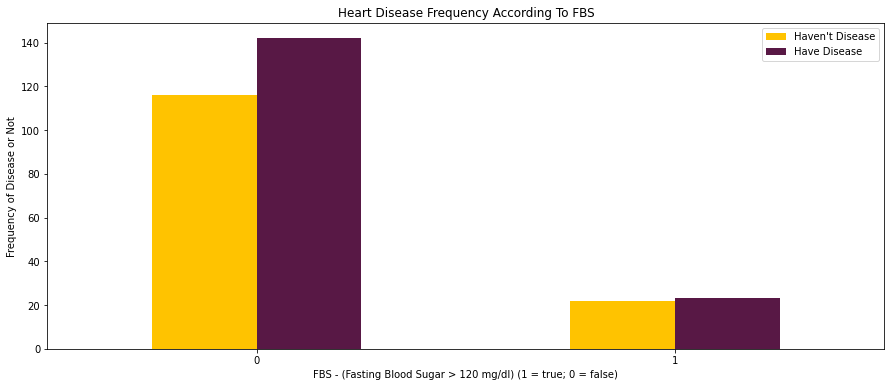

In [23]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

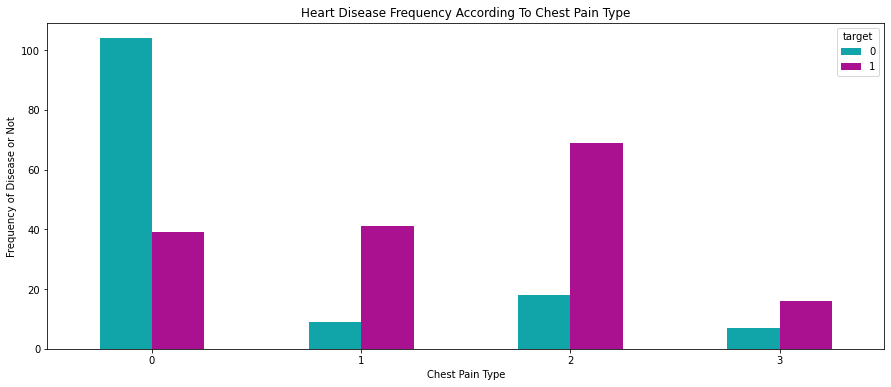

In [24]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# data preprocessing 

In [25]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
x,y=heart.loc[:,:'thal'],DF['target']

In [27]:
x.drop(['restecg','fbs','thal'],axis=1,inplace=True)
x
x.shape

(303, 10)

In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [31]:
x_train.shape

(212, 10)

In [32]:
y_train.shape

(212,)

In [33]:
x_train

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca
49,53,0,0,138,234,160,0,0.0,2,0
171,48,1,1,110,229,168,0,1.0,0,0
223,56,0,0,200,288,133,1,4.0,0,2
58,34,1,3,118,182,174,0,0.0,2,0
154,39,0,2,138,220,152,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,179,0,0.0,2,0
123,54,0,2,108,267,167,0,0.0,2,0
15,50,0,2,120,219,158,0,1.6,1,0
125,34,0,1,118,210,192,0,0.7,2,0


# data modeling using decision tree


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
x_test

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca
246,56,0,0,134,409,150,1,1.9,1,2
183,58,1,2,112,230,165,0,2.5,1,1
229,64,1,2,125,309,131,1,1.8,1,0
126,47,1,0,112,204,143,0,0.1,2,0
184,50,1,0,150,243,128,0,2.6,1,0
...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,163,0,0.0,2,0
21,44,1,2,130,233,179,1,0.4,2,0
210,57,1,2,128,229,150,0,0.4,1,1
78,52,1,1,128,205,184,0,0.0,2,0


In [36]:
prediction=dt.predict(x_test)


In [37]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [38]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [39]:
accuracy_dt

75.82417582417582

In [40]:
dt.feature_importances_

array([0.04512707, 0.04391232, 0.32392476, 0.11470176, 0.07422397,
       0.09717771, 0.04724994, 0.06746973, 0.07645805, 0.10975468])

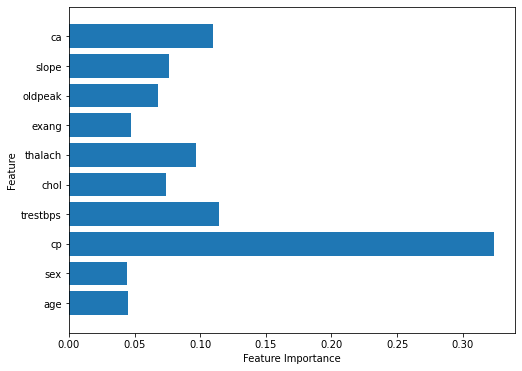

In [41]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_fetures=10
    plt.barh(range(n_fetures),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_fetures),x)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_fetures)
    
plot_feature_importance(dt)

In [42]:
x


,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,150,0,2.3,0,0
1,37,1,2,130,250,187,0,3.5,0,0
2,41,0,1,130,204,172,0,1.4,2,0
3,56,1,1,120,236,178,0,0.8,2,0
4,57,0,0,120,354,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0
299,45,1,3,110,264,132,0,1.2,1,0
300,68,1,0,144,193,141,0,3.4,1,2
301,57,1,0,130,131,115,1,1.2,1,1


In [43]:
custom_data=np.array([[45,1,3,110,264,132,0,1.2,1,0]])

In [44]:
custom_data_predicyion_dt=dt.predict(custom_data)
custom_data_predicyion_dt

array([0], dtype=int64)

In [45]:
category=['no you dont have heart disease','Yes you have heart disease']

In [46]:
print(category[int(custom_data_predicyion_dt)])

no you dont have heart disease


# using the classifier KNN

In [78]:
x


,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,150,0,2.3,0,0
1,37,1,2,130,250,187,0,3.5,0,0
2,41,0,1,130,204,172,0,1.4,2,0
3,56,1,1,120,236,178,0,0.8,2,0
4,57,0,0,120,354,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0
299,45,1,3,110,264,132,0,1.2,1,0
300,68,1,0,144,193,141,0,3.4,1,2
301,57,1,0,130,131,115,1,1.2,1,1


In [79]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler().fit(x)
x_std=std.transform(x)


In [80]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ...,  1.08733806,
        -2.27457861, -0.71442887],
       [-1.91531289,  0.68100522,  1.00257707, ...,  2.12257273,
        -2.27457861, -0.71442887],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.31091206,
         0.97635214, -0.71442887],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  2.03630317,
        -0.64911323,  1.24459328],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.13837295,
        -0.64911323,  0.26508221],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.89686172,
        -0.64911323,  0.26508221]])

In [81]:
x_train_std,x_test_std,y_train,y_test=train_test_split(x_std,y,random_state=10,test_size=0.3,shuffle=True)

In [82]:
x_train_std.shape

(212, 10)

In [83]:
x_test_std.shape

(91, 10)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train_std, y_train)
prediction = knn.predict(x_test_std)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test_std, y_test)*100))

2 NN Score: 82.42%


In [85]:
prediction_knn=knn.predict(x_test_std)


In [86]:
accuracy_knn=accuracy_score(y_test,prediction)*100

In [87]:
accuracy_knn

82.41758241758241

In [88]:
custom_data_knn=np.array([[45,1,3,110,264,132,0,1.2,1,0]])

In [89]:
custom_data_knn_std=std.transform(custom_data_knn)

In [90]:
custom_data_knn_std

array([[-1.03300228,  0.68100522,  1.97312292, -1.23499586,  0.34275624,
        -0.7717063 , -0.69663055,  0.13837295, -0.64911323, -0.71442887]])

In [91]:
custom_data_prediction_knn=knn.predict(custom_data_knn_std)

In [92]:
custom_data_prediction_knn

array([0], dtype=int64)

In [93]:
print(category[int(custom_data_prediction_knn)])

no you dont have heart disease


In [94]:
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))
    

In [95]:
scores

{1: 0.8241758241758241,
 2: 0.8241758241758241,
 3: 0.7692307692307693,
 4: 0.7692307692307693,
 5: 0.7582417582417582,
 6: 0.7802197802197802,
 7: 0.7912087912087912,
 8: 0.7802197802197802,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7582417582417582,
 12: 0.7692307692307693,
 13: 0.7692307692307693,
 14: 0.7802197802197802,
 15: 0.7692307692307693,
 16: 0.7802197802197802,
 17: 0.7912087912087912,
 18: 0.7912087912087912,
 19: 0.7582417582417582,
 20: 0.7472527472527473,
 21: 0.7472527472527473,
 22: 0.7582417582417582,
 23: 0.7472527472527473,
 24: 0.7802197802197802,
 25: 0.7472527472527473}

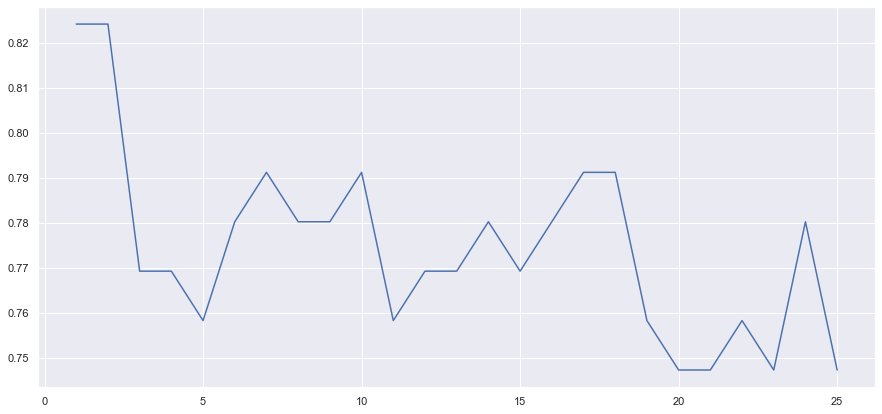

In [96]:
plt.plot(k_range,scores_list)

In [97]:
algorithms=["Decision Tree", "KNN"]
scores=[accuracy_dt,accuracy_knn]

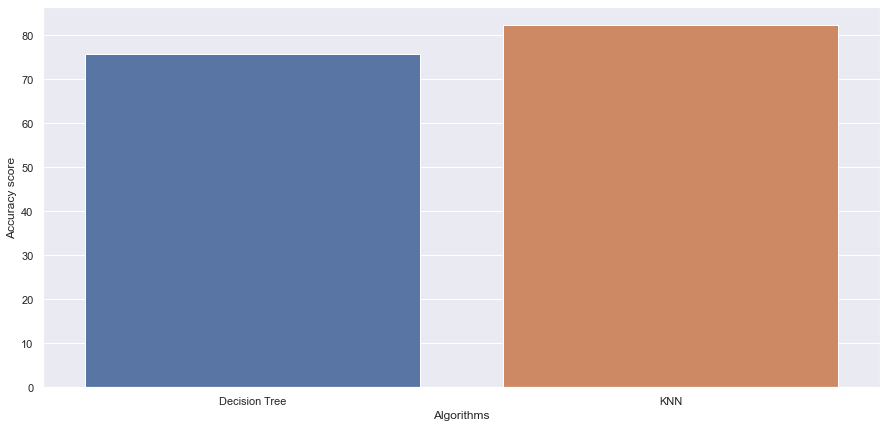

In [98]:
sb.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel('Accuracy score')
sb.barplot(algorithms,scores)

In [105]:
y_head_dtc = dt.predict(x_test)
knn2 = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn2.fit(x_train_std, y_train)
y_head_knn = knn2.predict(x_test_std)

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_knn = confusion_matrix(y_test,y_head_knn)


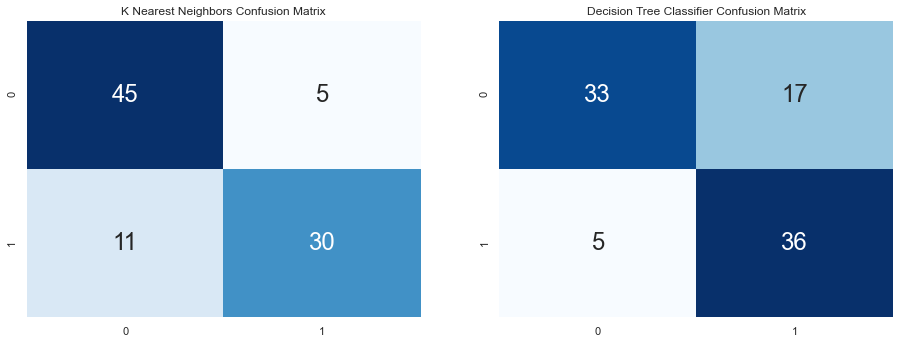

In [109]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
